In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
cian = pd.read_csv(r'Vlad_flat.csv', sep = ',', header = None,names = ['totsp','kitsp','livsp','floor','Nfloor','city','htype','year','overlaps','entrance','room','link','price'])

In [3]:
cian.head()

,totsp,kitsp,livsp,floor,Nfloor,city,htype,year,overlaps,entrance,room,link,price
0,"44,29",NaN,NaN,5,5,Ковровский район,NaN,NaN,NaN,NaN,1,https://vladimir.cian.ru/sale/flat/240388315/,3146408
1,35,7,19,10,10,Александров,Панельный,1983.0,Железобетонные,3.0,1,https://vladimir.cian.ru/sale/flat/245813716/,1220000
2,"45,2",7,31,5,5,Александров,Панельный,1978.0,Железобетонные,6.0,2,https://vladimir.cian.ru/sale/flat/245809869/,1150000
3,"51,17",NaN,NaN,6,14,Владимир,NaN,NaN,NaN,NaN,2,https://vladimir.cian.ru/sale/flat/237945364/,2814350
4,"31,1",NaN,NaN,2,3,Ковров,Кирпичный,1958.0,Деревянные,2.0,1,https://vladimir.cian.ru/sale/flat/225699884/,850000₽


In [4]:
cian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1509 entries, 0 to 1508
Data columns (total 13 columns):
totsp       1509 non-null object
kitsp       1362 non-null object
livsp       1400 non-null object
floor       1509 non-null int64
Nfloor      1509 non-null int64
city        1509 non-null object
htype       1111 non-null object
year        1009 non-null float64
overlaps    983 non-null object
entrance    1001 non-null float64
room        1509 non-null object
link        1509 non-null object
price       1509 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 153.3+ KB


In [5]:
for i in tqdm(range(len(cian['price']))):
    if '₽' in cian['price'][i]:
        cian['price'][i] = cian['price'][i][:-1]
    

  0%|                                                                                         | 0/1509 [00:00<?, ?it/s]C:\MAX\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
100%|█████████████████████████████████████████████████████████████████████████████| 1509/1509 [00:04<00:00, 371.75it/s]


In [6]:
N = len(cian)
cian = cian.dropna(axis='index', how='any', subset=['livsp'])
cian = cian.dropna(axis='index', how='any', subset=['kitsp'])


In [7]:
cian.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1345 entries, 1 to 1508
Data columns (total 13 columns):
totsp       1345 non-null object
kitsp       1345 non-null object
livsp       1345 non-null object
floor       1345 non-null int64
Nfloor      1345 non-null int64
city        1345 non-null object
htype       1009 non-null object
year        914 non-null float64
overlaps    894 non-null object
entrance    909 non-null float64
room        1345 non-null object
link        1345 non-null object
price       1345 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 147.1+ KB


In [8]:
cols = ['totsp','livsp','kitsp']
for col in cols:
    for i in tqdm(range(N)):
        try:
            cian[col][i] = cian[col][i].replace(',','.')
        except:
            pass

  0%|                                                                                         | 0/1509 [00:00<?, ?it/s]C:\MAX\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
100%|██████████████████████████████████████████████████████████████████████████████| 1509/1509 [00:31<00:00, 48.05it/s]


In [9]:
cian.head()

,totsp,kitsp,livsp,floor,Nfloor,city,htype,year,overlaps,entrance,room,link,price
1,35,7,19,10,10,Александров,Панельный,1983.0,Железобетонные,3.0,1,https://vladimir.cian.ru/sale/flat/245813716/,1220000
2,45.2,7,31,5,5,Александров,Панельный,1978.0,Железобетонные,6.0,2,https://vladimir.cian.ru/sale/flat/245809869/,1150000
5,50.2,6,41,5,5,Александров,Кирпичный,1970.0,Железобетонные,4.0,3,https://vladimir.cian.ru/sale/flat/246920752/,1850000
6,42.8,12,17.6,1,18,Владимир,NaN,NaN,NaN,NaN,1,https://vladimir.cian.ru/sale/flat/245694799/,2097200
10,51.6,9.4,26.8,1,18,Владимир,NaN,NaN,NaN,NaN,2,https://vladimir.cian.ru/sale/flat/245694803/,2476800


In [10]:
columns_fix = ['totsp','livsp','kitsp','price']
for col in tqdm(columns_fix):
    cian[col] = cian[col].astype('float64')

100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 166.76it/s]


In [11]:
cian['room'] = cian['room'].replace('Многокомнатная квартира, 97 м²','4')
cian['room'] = cian['room'].astype('float64')

In [12]:
cols_fix = ['year','entrance']
for col in cols_fix:
    cian[col] = cian[col].fillna(cian[col].mean())  ## заполняем числовые данные средним

In [13]:
cols_fix = ['htype','overlaps']
for col in cols_fix:
    cian[col] = cian[col].fillna(cian[col].mode()[0])  ## заполняем текстовые данные модой

In [14]:
cian.drop(['link'], axis =1, inplace =True)

In [15]:
cian.index = [i for i in range(len(cian))]

In [16]:
cian.head()

,totsp,kitsp,livsp,floor,Nfloor,city,htype,year,overlaps,entrance,room,price
0,35.0,7.0,19.0,10,10,Александров,Панельный,1983.000000,Железобетонные,3.000000,1.0,1220000.0
1,45.2,7.0,31.0,5,5,Александров,Панельный,1978.000000,Железобетонные,6.000000,2.0,1150000.0
2,50.2,6.0,41.0,5,5,Александров,Кирпичный,1970.000000,Железобетонные,4.000000,3.0,1850000.0
3,42.8,12.0,17.6,1,18,Владимир,Кирпичный,1974.657549,Железобетонные,3.733773,1.0,2097200.0
4,51.6,9.4,26.8,1,18,Владимир,Кирпичный,1974.657549,Железобетонные,3.733773,2.0,2476800.0


In [17]:
cian.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1345 entries, 0 to 1344
Data columns (total 12 columns):
totsp       1345 non-null float64
kitsp       1345 non-null float64
livsp       1345 non-null float64
floor       1345 non-null int64
Nfloor      1345 non-null int64
city        1345 non-null object
htype       1345 non-null object
year        1345 non-null float64
overlaps    1345 non-null object
entrance    1345 non-null float64
room        1345 non-null float64
price       1345 non-null float64
dtypes: float64(7), int64(2), object(3)
memory usage: 136.6+ KB


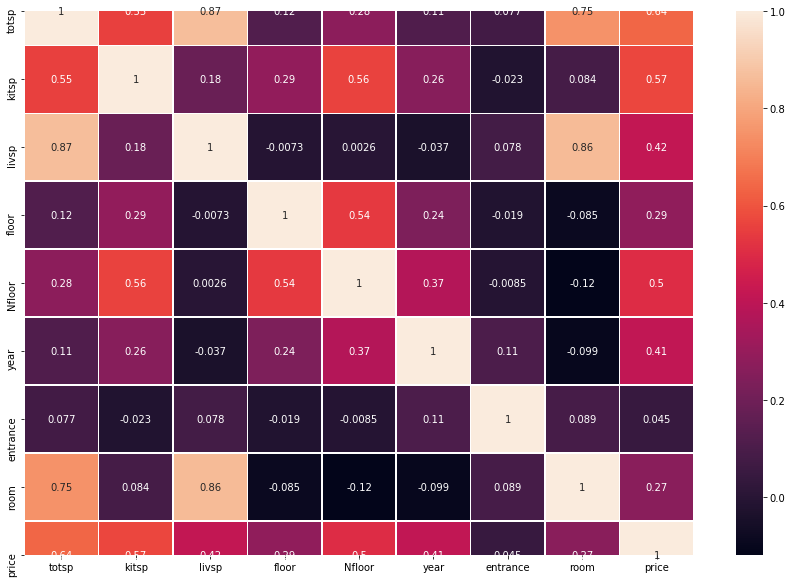

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
sns.heatmap(cian.corr(), ax=ax,linewidths=.5,annot = True)

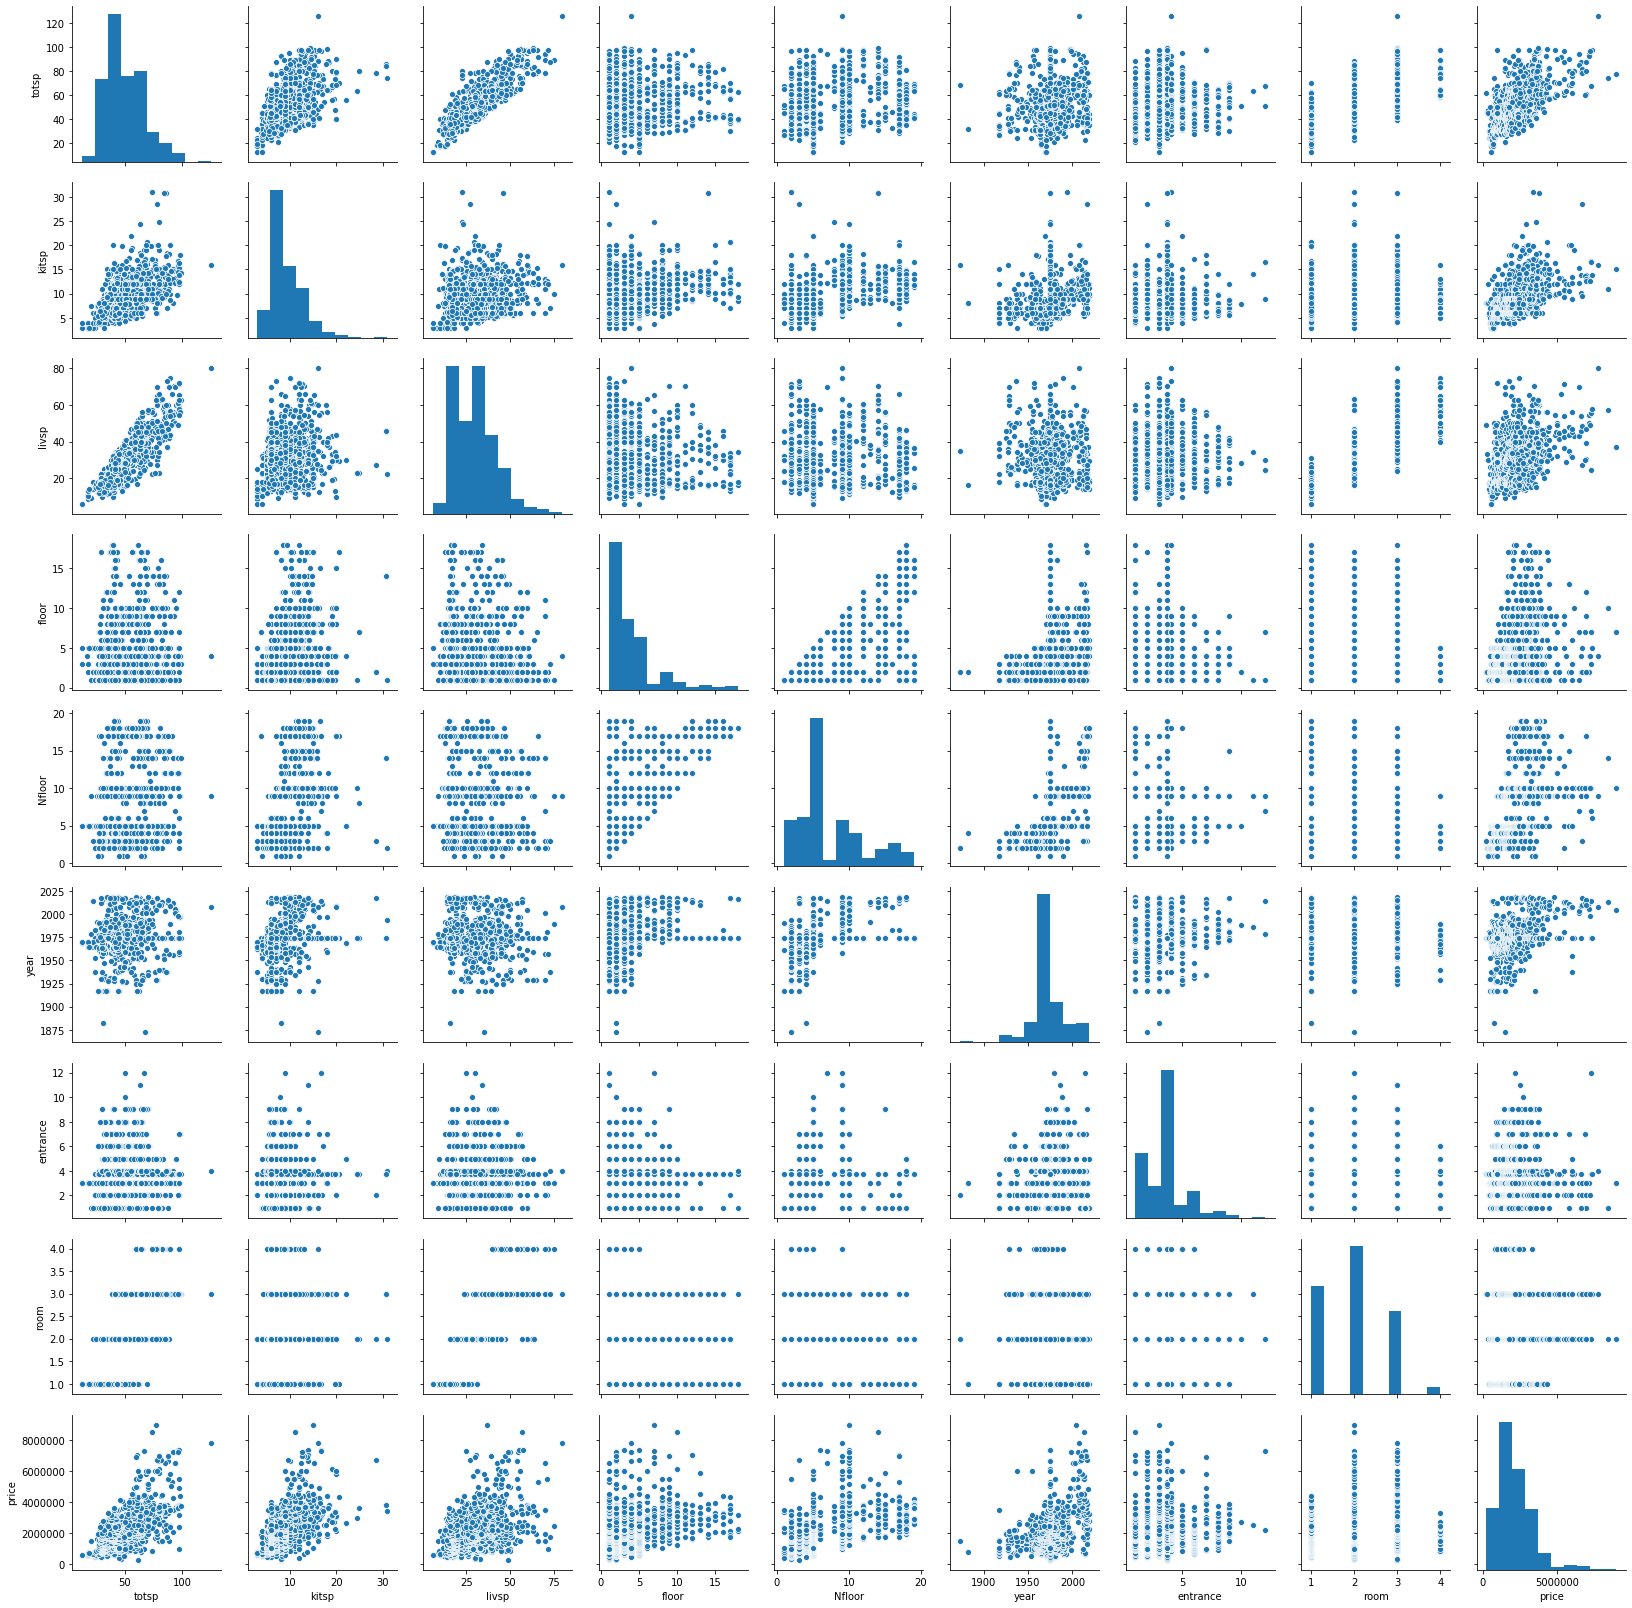

In [19]:
sns.pairplot(cian)

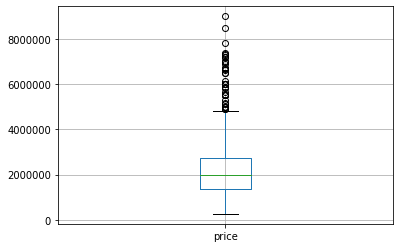

In [20]:
cian.boxplot('price')

C:\MAX\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


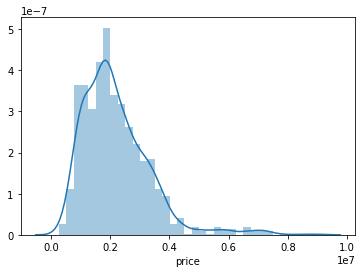

In [21]:
sns.distplot(cian['price'])


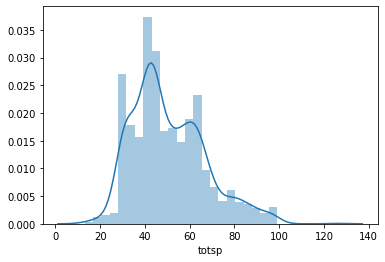

In [22]:
sns.distplot(cian['totsp'])

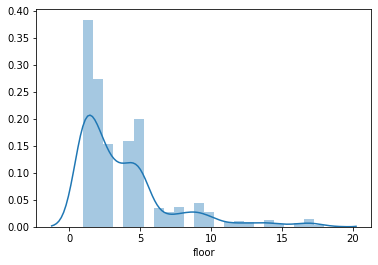

In [23]:
sns.distplot(cian['floor'])

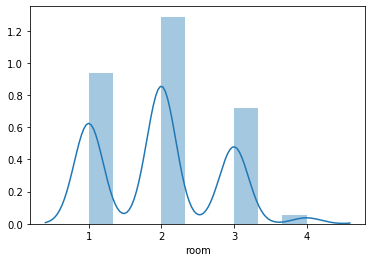

In [24]:
sns.distplot(cian['room'])

Text(0.5, 1.0, 'Price by overlaps')

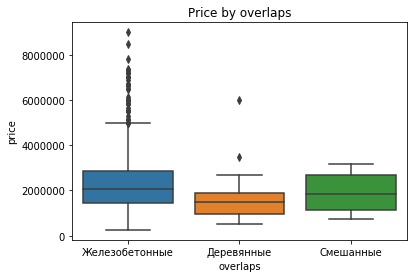

In [25]:
gb_price = sns.boxplot(x = 'overlaps',y = 'price', data = cian)
gb_price.set_title('Price by overlaps')

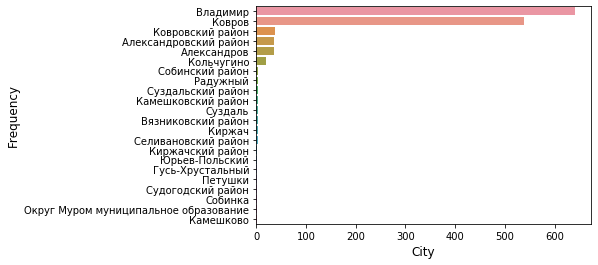

In [26]:
plt.figure()
sns.barplot(x=cian.city.value_counts(),y=cian.city.value_counts().index)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.show()

In [27]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib

In [28]:
categorical_columns= [column for column in cian.columns if cian[column].dtype == 'object']
for column in categorical_columns:
    print('Признак: {}, кол-во уникальных значений: {}'.format(column,cian[column].nunique()))
    print('Уникальные значения: ')
    print(cian[column].value_counts(), '\n')

Признак: city, кол-во уникальных значений: 22
Уникальные значения: 
Владимир                                 641
Ковров                                   539
Ковровский район                          37
Александровский район                     36
Александров                               36
Кольчугино                                20
Собинский район                            4
Радужный                                   3
Суздальский район                          3
Камешковский район                         3
Суздаль                                    3
Вязниковский район                         3
Киржач                                     3
Селивановский район                        3
Киржачский район                           2
Юрьев-Польский                             2
Гусь-Хрустальный                           2
Петушки                                    1
Судогодский район                          1
Собинка                                    1
Округ Муром муниципальное образо

In [29]:
import sklearn.preprocessing
onehot_encoder = sklearn.preprocessing.OneHotEncoder(sparse=False)

In [30]:
categorical_columns= [column for column in cian.columns if cian[column].dtype == 'object']
encoded_categorical_columns = pd.DataFrame(onehot_encoder.fit_transform(cian[categorical_columns]))
encoded_categorical_columns.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [31]:
cian=pd.concat([encoded_categorical_columns, cian], axis=1)
cian.drop(['city','overlaps','htype'], axis =1, inplace =True)

In [32]:
cian.head()

,0,1,2,3,4,5,6,7,8,9,...,30,totsp,kitsp,livsp,floor,Nfloor,year,entrance,room,price
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,35.0,7.0,19.0,10,10,1983.000000,3.000000,1.0,1220000.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,45.2,7.0,31.0,5,5,1978.000000,6.000000,2.0,1150000.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,50.2,6.0,41.0,5,5,1970.000000,4.000000,3.0,1850000.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,42.8,12.0,17.6,1,18,1974.657549,3.733773,1.0,2097200.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,51.6,9.4,26.8,1,18,1974.657549,3.733773,2.0,2476800.0


In [33]:
from sklearn.linear_model import (LinearRegression, LassoCV, RidgeCV, Lasso, Ridge )
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, MinMaxScaler, Normalizer)
from sklearn.metrics import mean_squared_error as mse,mean_squared_log_error as msle
from time import time
models = ['LinearRegression','RidgeCV','KNN','DecesionTree','GradientBoosting','RandomForest']
r2_train = []
r2_test = []
rmse = []
time_list = []
metrics = ['R^2 on train','R^2 on test','RMSE','TIME']

In [34]:
X=cian.drop('price',axis=1)
y=cian['price']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

# LinearRegression

In [36]:
t1 = time()
model = LinearRegression(normalize = True)
model.fit(X_train,y_train)
pred1 = model.predict(X_test)
r2_1 = model.score(X_train,y_train)
r_1 = model.score(X_test,y_test)
rmse_1 = mse(y_test,pred1,squared = False)
t2 = time()
t_1 = t2-t1
r2_train.append(r2_1)
r2_test.append(r_1)
rmse.append(rmse_1)
time_list.append(t_1)

# Ridge

In [37]:
t1 = time()
model2 = RidgeCV([0.001,0.01,0.1])
model2.fit(X_train,y_train)
pred2 = model2.predict(X_test)
r2_2 = model2.score(X_train,y_train)
r_2 = model2.score(X_test,y_test)
rmse_2 = mse(y_test,pred2,squared = False)
t2 = time()
t_2 = t2-t1
r2_train.append(r2_2)
r2_test.append(r_2)
rmse.append(rmse_2)
time_list.append(t_2)

# KNN

In [38]:
from sklearn.neighbors import KNeighborsRegressor

KNregressor = KNeighborsRegressor()

KNregressor.fit(X_train, y_train)

print("R^2: {}".format(KNregressor.score(X_test,y_test)))

R^2: 0.6226127759835163


In [39]:
from sklearn.model_selection import GridSearchCV, cross_val_score
knn_params = {'n_neighbors': range(4,15)}

nneigh = GridSearchCV(KNregressor, knn_params,
                         cv=5, n_jobs=-1,
                        verbose=True)

nneigh.fit(X_train, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  55 | elapsed:    2.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    2.4s finished


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': range(4, 15)}, verbose=True)

In [40]:
nneigh.best_params_

{'n_neighbors': 10}

In [41]:
t1 = time()
model3 = KNeighborsRegressor(10)
model3.fit(X_train,y_train)
pred3 = model3.predict(X_test)
r2_3 = model3.score(X_train,y_train)
r_3 = model3.score(X_test,y_test)
rmse_3 = mse(y_test,pred3,squared = False)
t2 = time()
t_3 = t2-t1
r2_train.append(r2_3)
r2_test.append(r_3)
rmse.append(rmse_3)
time_list.append(t_3)

# DTree

In [42]:
from sklearn.tree import DecisionTreeRegressor
     
reg_tree = DecisionTreeRegressor()

reg_tree.fit(X_train, y_train)
print("R^2: {}".format(reg_tree.score(X_test,y_test)))

R^2: 0.7109621227827083


In [43]:
tree_params = {'max_depth': range(1,15),
               'max_features': range(1,20)}

grid_tree = GridSearchCV(reg_tree, tree_params,
                         cv=5, n_jobs=-1,
                        verbose=True)

grid_tree.fit(X_train, y_train) 


Fitting 5 folds for each of 266 candidates, totalling 1330 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1330 out of 1330 | elapsed:    1.9s finished


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(1, 15),
                         'max_features': range(1, 20)},
             verbose=True)

In [44]:
grid_tree.best_params_

{'max_depth': 8, 'max_features': 19}

In [45]:
t1 = time()
model4 = DecisionTreeRegressor(max_depth = 12,max_features = 13)
model4.fit(X_train,y_train)
pred4 = model4.predict(X_test)
r2_4 = model4.score(X_train,y_train)
r_4 = model4.score(X_test,y_test)
rmse_4 = mse(y_test,pred4,squared = False)
t2 = time()
t_4 = t2-t1
r2_train.append(r2_4)
r2_test.append(r_4)
rmse.append(rmse_4)
time_list.append(t_4)
r2_4

0.9818598606593828

# GradientBoosting

In [46]:
from sklearn.ensemble import GradientBoostingRegressor
t1 = time()
model5 = GradientBoostingRegressor()
model5.fit(X_train,y_train)
pred5 = model5.predict(X_test)
r2_5 = model5.score(X_train,y_train)
r_5 = model5.score(X_test,y_test)
rmse_5 = mse(y_test,pred5,squared = False)
t2 = time()
t_5 = t2-t1
r2_train.append(r2_5)
r2_test.append(r_5)
rmse.append(rmse_5)
time_list.append(t_5)

# Random Forest 

In [47]:
from sklearn.ensemble import RandomForestRegressor
t1 = time()
model6 = RandomForestRegressor(300,min_samples_leaf = 1)
model6.fit(X_train,y_train)
pred6 = model6.predict(X_test)
r2_6 = model6.score(X_train,y_train)
r_6 = model6.score(X_test,y_test)
rmse_6 = mse(y_test,pred6,squared = False)
t2 = time()
t_6 = t2-t1
r2_train.append(r2_6)
r2_test.append(r_6)
rmse.append(rmse_6)
time_list.append(t_6)

# Сравнение моделей

In [48]:
l_metr = [r2_train,r2_test,rmse,time_list]       
results = pd.DataFrame(data=l_metr,index=metrics, columns=models)
results.head(2).style.highlight_max(axis='columns')

,LinearRegression,RidgeCV,KNN,DecesionTree,GradientBoosting,RandomForest
R^2 on train,0.726999,0.726972,0.713987,0.98186,0.903312,0.9718
R^2 on test,-5.56564e+23,0.707887,0.64656,0.510757,0.746488,0.780553


In [49]:
results.tail(2).style.highlight_min(axis='columns')

,LinearRegression,RidgeCV,KNN,DecesionTree,GradientBoosting,RandomForest
RMSE,8.82713e+17,639496,703429,827608,595747,554277
TIME,0.0159893,0.00799465,0.0479686,0.0159905,0.151895,1.37293


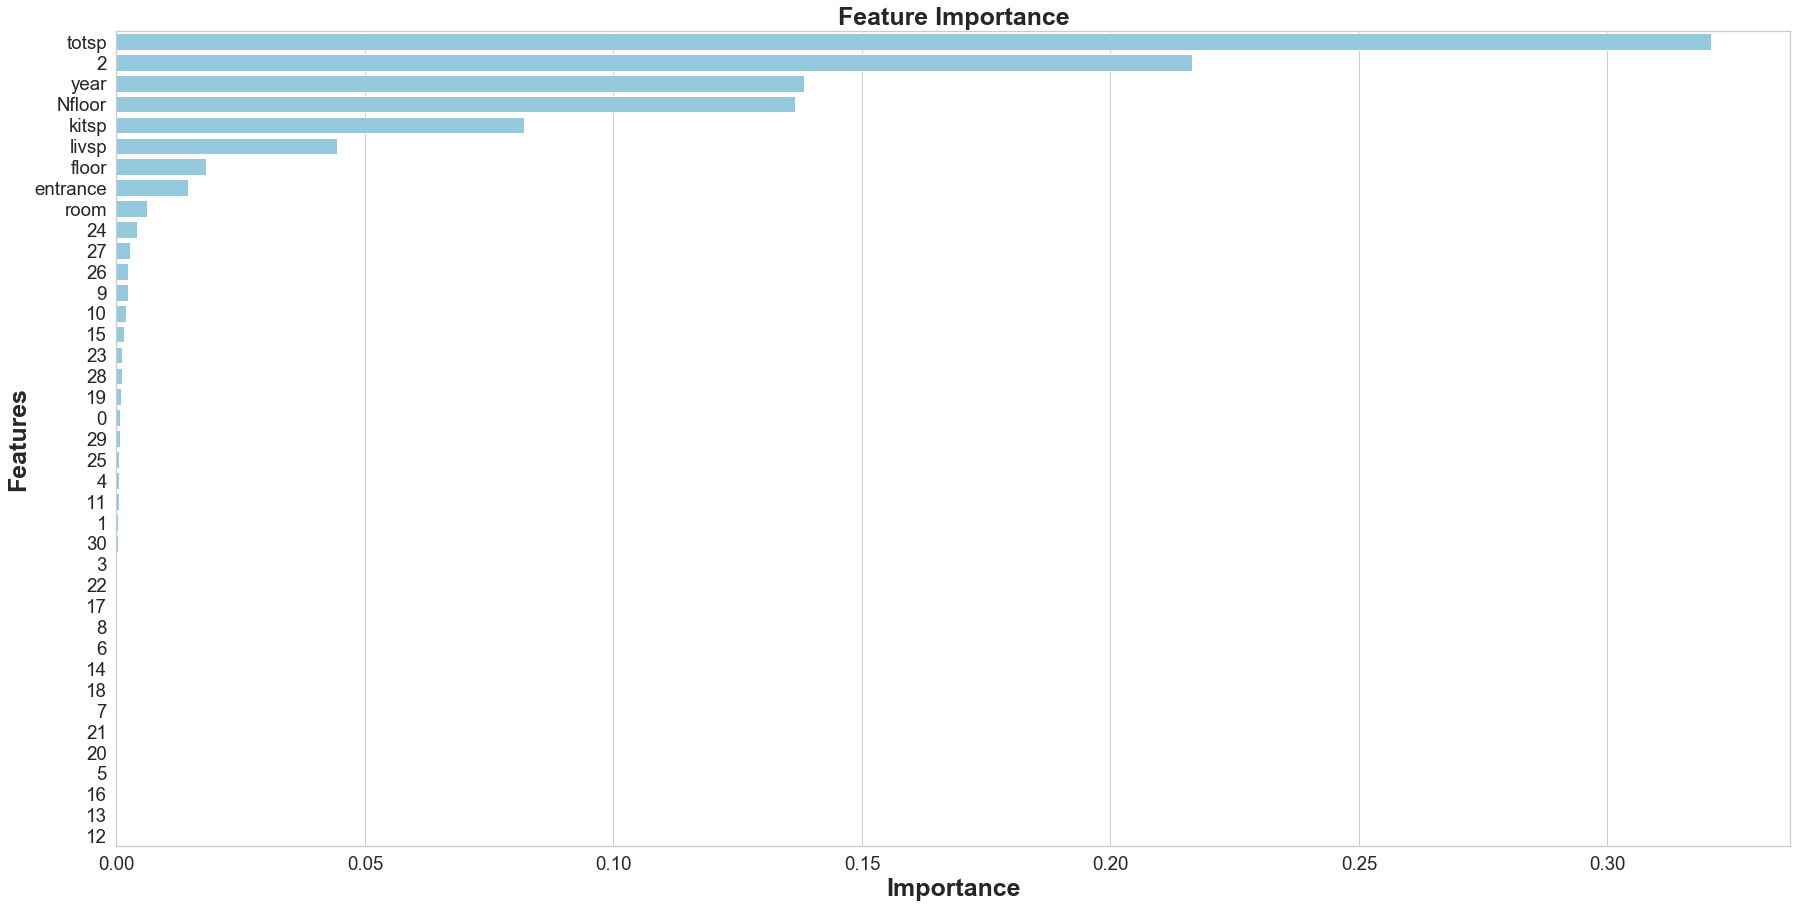

None

,Features,Gini-Importance
0,totsp,0.320779
1,2,0.216489
2,year,0.138300
3,Nfloor,0.136573
4,kitsp,0.082071
5,livsp,0.044427
6,floor,0.018008
7,entrance,0.014447
8,room,0.006112
9,24,0.004222


0.5868535041809082


In [50]:
t1 = time()
feats = {}
for feature, importance in zip(X.columns, model6.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)
t2 = time()
print(t2-t1)

In [51]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    RandomForestRegressor(300,min_samples_leaf = 1),
    X = X,
    y = y, 
    scoring = "r2",
    n_jobs = 1
)

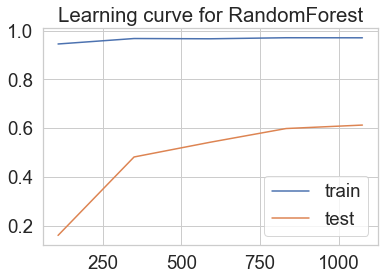

In [52]:
plt.plot(train_sizes, np.mean(train_scores, axis = 1), label = "train")
plt.plot(train_sizes, np.mean(test_scores, axis = 1), label = "test")
plt.title("Learning curve for RandomForest")
plt.legend()

# Кластерный анализ

In [53]:
cian

,0,1,2,3,4,5,6,7,8,9,...,30,totsp,kitsp,livsp,floor,Nfloor,year,entrance,room,price
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,35.00,7.0,19.0,10,10,1983.000000,3.000000,1.0,1220000.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,45.20,7.0,31.0,5,5,1978.000000,6.000000,2.0,1150000.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,50.20,6.0,41.0,5,5,1970.000000,4.000000,3.0,1850000.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,42.80,12.0,17.6,1,18,1974.657549,3.733773,1.0,2097200.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,51.60,9.4,26.8,1,18,1974.657549,3.733773,2.0,2476800.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,53.00,6.0,40.0,4,5,1974.657549,3.733773,3.0,1800000.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,41.00,6.0,30.0,3,4,1962.000000,3.000000,2.0,1750000.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,62.00,8.0,49.0,2,3,1974.657549,3.733773,3.0,260000.0
8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,42.35,11.8,15.4,1,12,1974.657549,3.733773,1.0,1778700.0
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,37.10,10.5,13.0,17,18,1974.657549,3.733773,1.0,1930000.0


In [54]:
cian.drop(['price'], axis =1, inplace =True)

In [55]:
cian.drop(['year'], axis =1, inplace =True)

In [56]:
names = list(cian.columns)


In [57]:
cian1 = preprocessing.normalize(cian)
scaled_df = pd.DataFrame(cian1, columns=names)
scaled_df.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,totsp,kitsp,livsp,floor,Nfloor,entrance,room
0,0.023262,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.023262,0.0,0.814174,0.162835,0.441980,0.232621,0.232621,0.069786,0.023262
1,0.017829,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.017829,0.0,0.805854,0.124800,0.552687,0.089143,0.089143,0.106972,0.035657
2,0.015223,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.015223,0.0,0.764208,0.091340,0.624154,0.076116,0.076116,0.060893,0.045670
3,0.000000,0.0,0.019505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.019505,0.0,0.834808,0.234058,0.343285,0.019505,0.351087,0.072827,0.019505
4,0.000000,0.0,0.016190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.016190,0.0,0.835404,0.152186,0.433892,0.016190,0.291420,0.060450,0.032380


In [58]:
# Объект, в котором будет хранится информация о последовательном слиянии кластеров
# Используем расстояние между объектами - евклидово
# Расстояние между кластерами - методом Уорда
link = linkage(cian1, 'ward', 'euclidean')

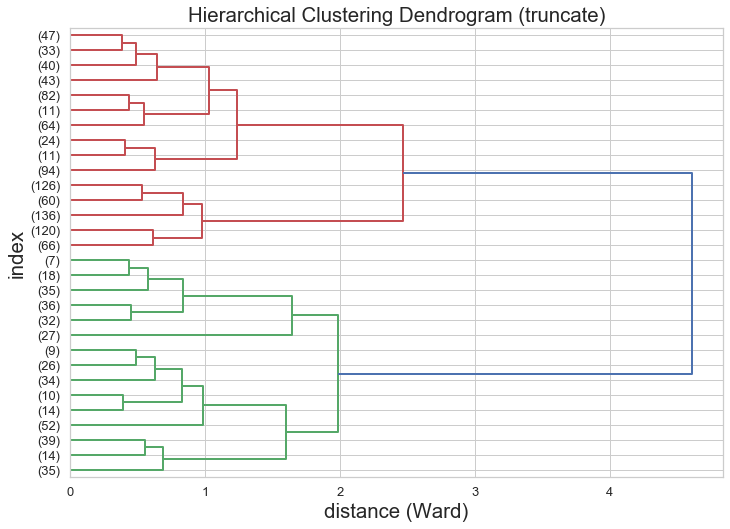

In [59]:
matplotlib.rcParams['lines.linewidth'] = 2

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

dn = dendrogram(link,
                truncate_mode='lastp',
                orientation = "right",
                )
ax.tick_params(labelsize=13)
plt.title('Hierarchical Clustering Dendrogram (truncate)')
plt.ylabel('index')
plt.xlabel('distance (Ward)')
plt.show()

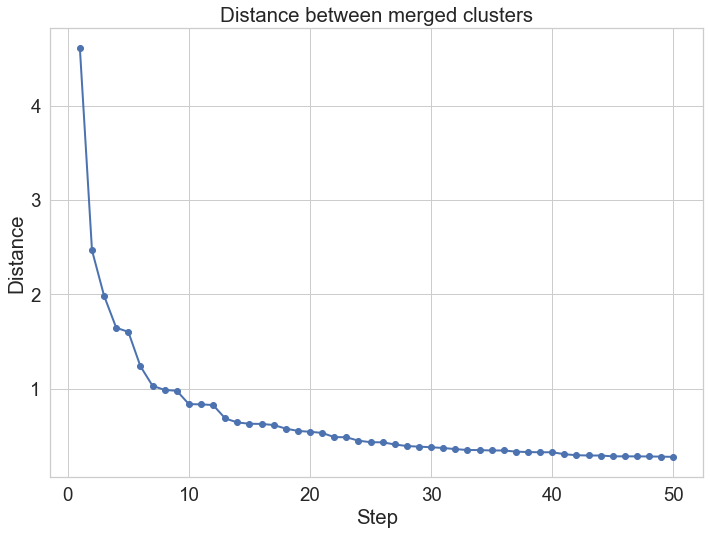

In [60]:
dist = link[-50:, 2]
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Distance between merged clusters')
plt.xlabel('Step')
plt.ylabel('Distance')


plt.show()

# K-means

In [61]:
model = KMeans(n_clusters = 4).fit(cian1)
clusters = model.predict(cian1)

In [62]:
cian['clusters'] = clusters

In [63]:
cian.groupby('clusters').size()

clusters
0    574
1    487
2    106
3    178
dtype: int64

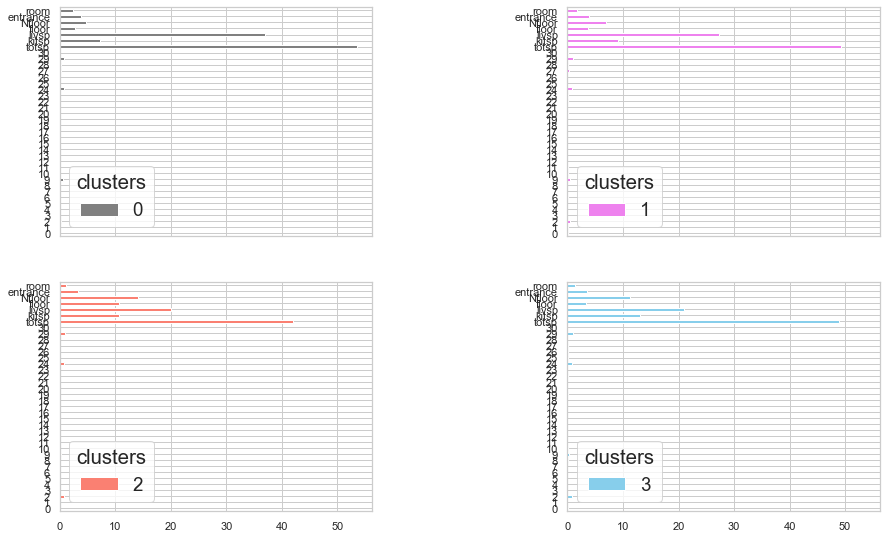

In [64]:
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True)
fig.set_size_inches(14.7, 9.27)
plt.subplots_adjust( wspace=0.625)
k = 0
c = ['grey', 'violet', 'salmon', 'skyblue', 'orange']
for i in range(2):
    for j in range(2):
        ax = axs[i, j]
        k += 1
        cian[cian.clusters == k-1].groupby('clusters').mean().T.plot.barh(ax = ax, color = c[k-1])
        ax.tick_params(labelsize = 11)

